# <center> МНК и полиномиальные признаки

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import sweetviz as sv

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('/Users/zond/Desktop/python/vs_code/data/unconv.csv')
data.head()


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


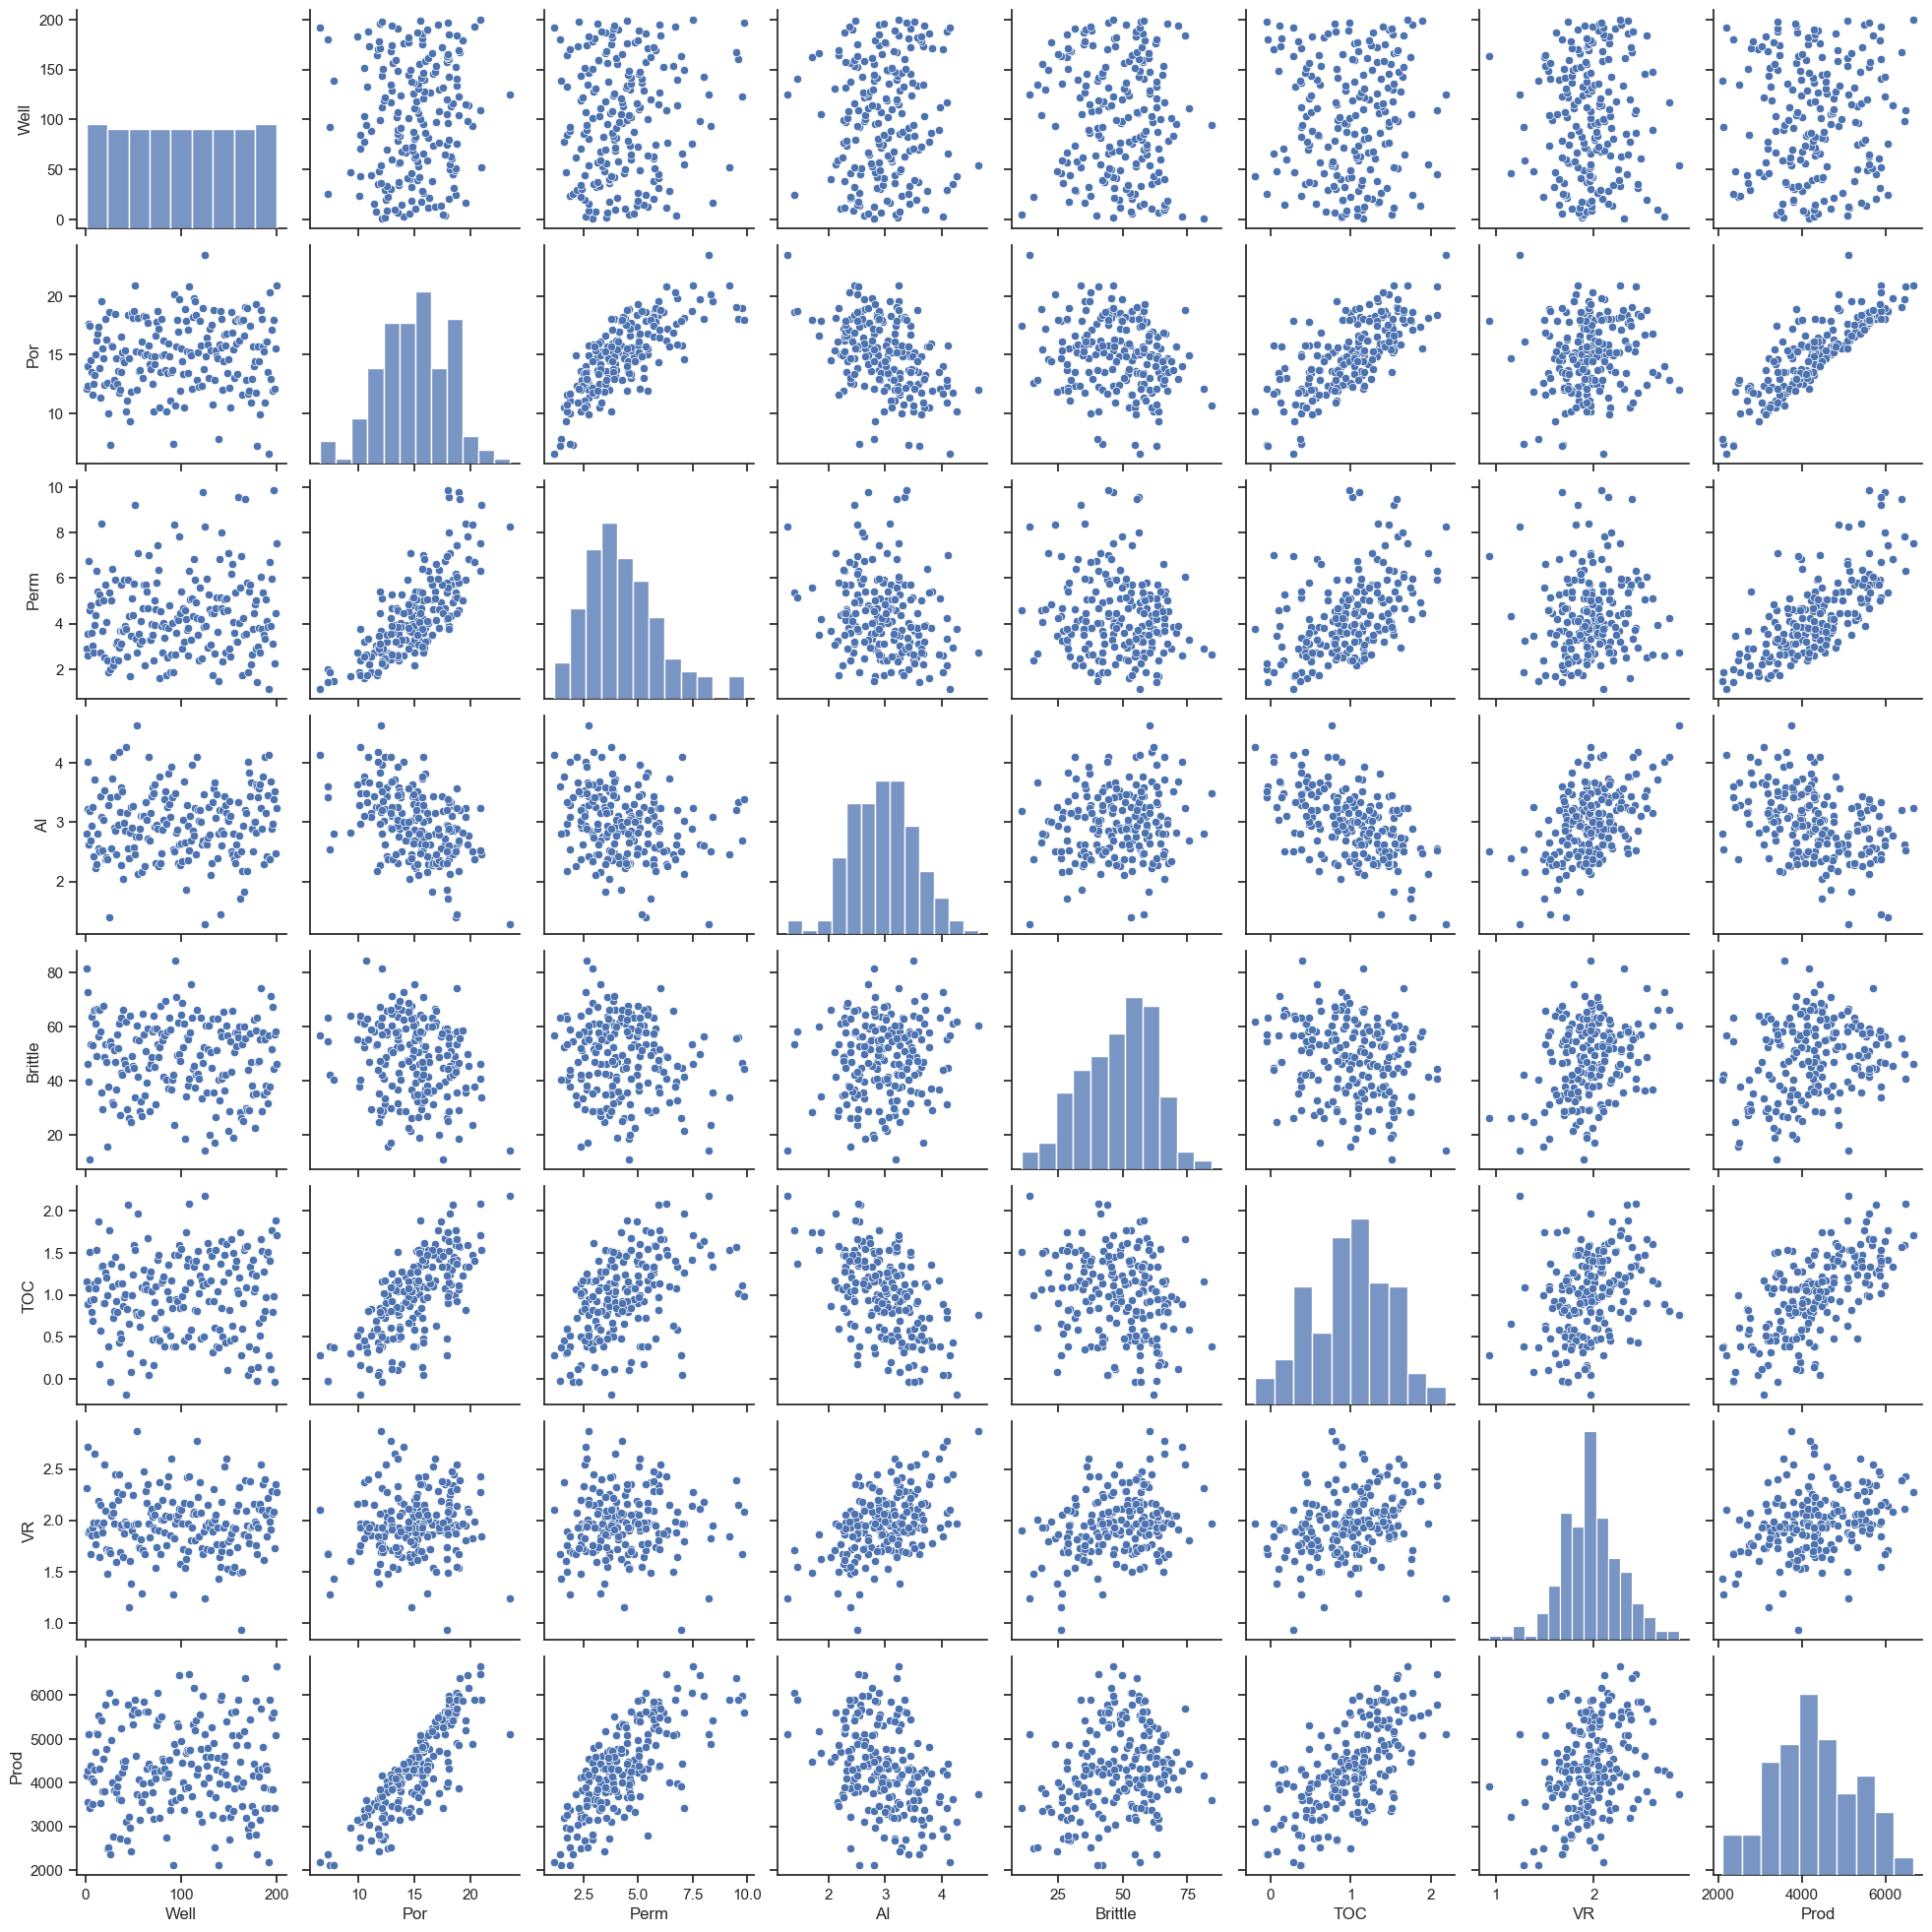

In [3]:
# Ваш код здесь
display(data.describe())

sns.set_theme(style="ticks")
sns.pairplot(data);

Matrix rank:8
Matrix det:0.0007299388072652082


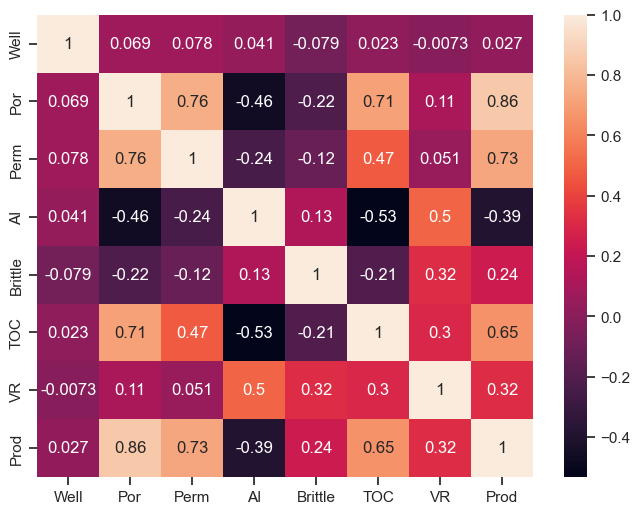

In [4]:
# Ваш код здесь
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot= True);

print(f'Matrix rank:{np.linalg.matrix_rank(data.corr())}')
print(f'Matrix det:{np.linalg.det(data.corr())}')



>Из представленной корреляционной матрицы можно сделать вывод, что большинство признаков имеют сильную корреляцию между собой, что хорошо видно по определителю матрицы.

* **Какие факторы сильнее всего коррелируют с целевой переменной?**  

>Несколько факторов демонстрируют сильную корреляцию. Можно выделить фактор `Por`, который коррелирует с целевой переменной, а также `Perm`. На третьем месте по степени корреляции стоит `TOC`.

* **Является ли корреляционная матрица плохо обусловленной (близок ли её определитель к нулю)?** 

>Определитель корреляционной матрицы равен 0.0007299388702652802, что очень близко к нулю. Это свидетельствует о наличии мультиколлинеарности между переменными.

* **Что вы можете сказать о наличии коллинеарности/мультиколлинеарности в данных?**  

>Наличие мультиколлинеарности подтверждается низким значением определителя матрицы. Кроме того, некоторые факторы, такие как `Por` и `Perm`, имеют сильную корреляцию друг с другом, что также указывает на вырожденность матрицы.

* **Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?**  

>Модель применима, но может дать неоптимальные результаты. Это связано с тем, что мультиколлинеарность может привести к нестабильности оценок коэффициентов, что затрудняет их интерпретацию и ухудшает обобщающую способность модели.

In [5]:
# Ваш код здесь
data['bais'] = 1
data = data[['bais', 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']]
# Извлекаем таргет
y = data['Prod'].values
# Извлекаем фичи
X = data.drop('Prod', axis=1).values

# Вычисляем веса линейной регрессии с использованием МНК
w = np.linalg.inv(X.T @ X) @ X.T@y

# Округление значений w и транспонирование для соответствия форме (1, 7)
w_rounded = np.round(w.reshape(1, 8))

# Создание DataFrame 
w_df = pd.DataFrame(w_rounded, columns=data.drop('Prod', axis=1).columns, index=['weight'])
w_df


,bais,Well,Por,Perm,AI,Brittle,TOC,VR
weight,-1232.0,0.0,230.0,116.0,-365.0,25.0,-78.0,785.0


>После вычесления весов линейной регрессии методом МНК можно ответить на следующие вопросы
>* **Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?**

>Да, такой признак есть и это номер вышки, то есть Well, так как w при нем очень маленький, и он не будет делать значимы вклад в итоговый результат.
>* **Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.**

>Можно посмотреть признак VR, который делает очень большой вклад в итоговый результат, так увелечение данного признака на 1, даст прирост на 1125 млн. кубических футов газа в сутки, а вот с признаком AI наоборот его увиличение на 1 уменьшет добычу на 676.0 млн. кубических футов газа в сутки. Что в целом может быть логично, так как признак VR лежит в значениях от 0 до 2, а AI в 0 - 5

In [6]:

# Hеобходимые метрики 
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))**0.5


# Данные для конкретной скважины
well_106 = np.array([1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
# Прогнозируем выход для скважины 106 
pred_106 = well_106 @ w.T
# Истинное значение для скважины
true_106 = 4748.315024

print(f"Абсолютное значение ошибки для скважины 106: {abs(true_106 - pred_106):.2f}")
print('-'* 63)


# Расчет предсказанных значений для всего набора данных
y_pred = X @ w.T

print(f"Корень из среднеквадратичной ошибки для всех прогнозов: {rmse(y, y_pred):.2f}")
print(f"Абсолютное значение ошибки для всех прогнозов: {mae(y, y_pred):.2f}")
print(f"Среднее значение целевой переменной: {np.mean(y):.2f}")

Абсолютное значение ошибки для скважины 106: 25.25
---------------------------------------------------------------
Корень из среднеквадратичной ошибки для всех прогнозов: 198.28
Абсолютное значение ошибки для всех прогнозов: 153.62
Среднее значение целевой переменной: 4311.22


>Говоря о точности данной модели, можно сказать, что она достаточно хорошо аппроксимирует целевую переменную, так как средняя абсолютная ошибка в 153.62 единицы это около 3.6 процентов отклонения от среднего значения целевой переменной, составляющего 4311.22. Это указывает на достаточно высокую точность модели в общем. Однако, корень из среднеквадратичной ошибки (RMSE) равный 198.28 указывает на наличие выбросов с более значительными ошибками прогноза, что может свидетельствовать о предрасположенности модели к ошибкам в условиях определенных нестандартных ситуаций или данных. В частности, абсолютное значение ошибки для скважины 106 составляет 25.25, что является довольно низким отклонением

In [7]:
# Ваш код здесь
prod_corr = round(data.corr().iloc[[7]].drop('Prod', axis=1), 2)
prod_corr.index = ['Prod corr']


pd.concat([prod_corr, w_df], axis=0)

,bais,Well,Por,Perm,AI,Brittle,TOC,VR
Prod corr,NaN,-0.01,0.11,0.05,0.5,0.32,0.3,1.0
weight,-1232.0,0.00,230.00,116.00,-365.0,25.00,-78.0,785.0


>После анализа весов модели и корреляции факторов с целевой переменной можно сразу отметить, что коллекции указывают на положительную зависимость целевой переменной от фактора номер скважины, а вот веса модели говорят об обратном, так как имеют отрицательный знак. Однако данный фактор является случайным шумом, и корреляция в 0.03 говорит об этом. Здесь же можно отметить, что вес при самом коррелированном факторе является не самым большим, но это связано с тем, что факторы не были отскорректированы; значению весов нельзя интерпретировать как их значимость больше другого. А вот с фактором общего органического углерода ситуация неприятная, так как корреляция целевой переменной у него положительная, а вот вес модели стоит со знаком минус. Такая ситуация появилась из-за корреляции исходных признаков, и это сделало модель неустойчивой.

,bais,Por,AI,Brittle,VR
weight OLS,-1835.0,293.0,-200.0,28.0,517.0


,bais,Por,AI,Brittle,VR
Prod corr,NaN,0.11,0.5,0.32,1.0
weight OLS,-1835.0,293.00,-200.0,28.00,517.0


Корень из среднеквадратичной ошибки для всех прогнозов: 231.65
Абсолютное значение ошибки для всех прогнозов: 171.43
Среднее значение целевой переменной: 4311.22


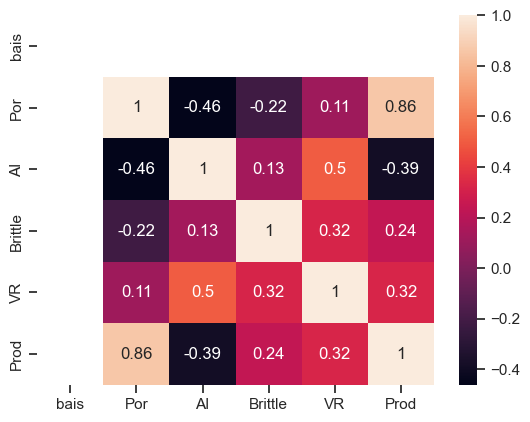

In [8]:
# Ваш код здесь
sns.heatmap(data.drop(['TOC', "Perm", 'Well'], axis=1).corr(), annot=True);

# Извлекаем таргет
y = data['Prod'].values
# Извлекаем фичи
X = data.drop(['Prod', 'TOC', "Perm", 'Well'], axis=1).values

# Вычисляем веса линейной регрессии с использованием МНК
w = np.linalg.inv(X.T @ X) @ X.T@y

# Округление значений w и транспонирование для соответствия форме (1, 4)
w_rounded = np.round(w.reshape(1, 5))

# Создание DataFrame 
w_df = pd.DataFrame(w_rounded, columns=data.drop(['Prod', 'TOC', "Perm", 'Well'], axis=1).columns, index=['weight OLS'])
display(w_df)

prod_corr = round(data.corr().iloc[[7]].drop(['Prod', 'TOC', "Perm", 'Well'], axis=1), 2)
prod_corr.index = ['Prod corr']

stat_df = pd.concat([prod_corr, w_df], axis=0)
display(stat_df)
# Расчет предсказанных значений для всего набора данных
y_pred = X @ w.T

print(f"Корень из среднеквадратичной ошибки для всех прогнозов: {rmse(y, y_pred):.2f}")
print(f"Абсолютное значение ошибки для всех прогнозов: {mae(y, y_pred):.2f}")
print(f"Среднее значение целевой переменной: {np.mean(y):.2f}")



Ваши выводы здесь
>Так как у нас мало факторов, их можно исключить ручным способом, анализируя матрицу корреляции. Будем исключать факторы TOC и Perm, так как они сильно коррелируют между собой. Но самое главное, что они имеют критическую корреляцию, установленную заказчиком, с фактором Por (>.7), что кажется логичным, так как от пористости породы зависит проницаемость газа и количество этого газа. Также я нашел информацию, что от пористости породы зависит добыча газа, что хорошо видно по коэффициенту корреляции с целевой переменной, так как эта корреляция больше, чем у двух других факторов. Именно этот фактор мы и оставим. Конечно, сразу стоит исключить фактор Well, так как он является фиктивным, и корреляция с целевой переменной и вес перед ним говорят о том, что значимость фактора близка к шуму.

>Конечно, под условие < .05 попадает фактор AI, но видимо, автор имел в виду абсолютные значения.

Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
>Так можно сказать, что его увеличение на 1 будет давать прирост в 235 млн. кубических футов газа в сутки.

Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
>Показатели метрик стали хуже, так как теперь в среднем мы ошибаемся на 216 ед., что около 5% против 3% в прошлой итерации модели, а также ухудшилась метрика RMSE, что говорит об увеличении выбросов. Такая ситуация говорит о том, что порог в .7 является ошибочным, а простое удаление этих коэффициентов приводит к ухудшению модели. Поэтому можно было либо повысить порог, либо перейти к методу PCA.

Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?
>Да, данного противоречия больше нет, так как теперь знаки при весах соответствуют показателям корреляции, а также, учитывая масштаб значений, веса логично соответствуют корреляции.

In [9]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

coef = model.coef_
# Округление значений w и транспонирование для соответствия форме (1, 7)
coef_rounded = np.round(coef.reshape(1, 5))

# Создание DataFrame 
coef_df = pd.DataFrame(coef_rounded, columns=data.drop(['Prod', 'TOC', "Perm", 'Well'], axis=1).columns, index=['weight LR'])
coef_df['bais'] =  np.round(model.intercept_)
display(pd.concat([stat_df, coef_df], axis=0))

print(f"Корень из среднеквадратичной ошибки для всех прогнозов: {rmse(y, y_pred):.2f}")
print(f"Абсолютное значение ошибки для всех прогнозов: {mae(y, y_pred):.2f}")
print(f"Среднее значение целевой переменной: {np.mean(y):.2f}")

,bais,Por,AI,Brittle,VR
Prod corr,NaN,0.11,0.5,0.32,1.0
weight OLS,-1835.0,293.00,-200.0,28.00,517.0
weight LR,-1835.0,293.00,-200.0,28.00,517.0


Корень из среднеквадратичной ошибки для всех прогнозов: 231.65
Абсолютное значение ошибки для всех прогнозов: 171.43
Среднее значение целевой переменной: 4311.22


> Итоги совпадают, все ок

## Практика: полиномиальная регрессия и регуляризация

In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [11]:
X = data.drop(['bais', 'Prod', 'TOC', "Perm", 'Well'], axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_pol = poly.fit_transform(X)
print('Shape:', X_pol.shape)

liner_model = LinearRegression()

scores = cross_validate(liner_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)

# Выводим результаты
print("Train RMSE:", np.mean(scores['train_neg_root_mean_squared_error']*-1))
print("Test RMSE:", np.mean(scores['test_neg_root_mean_squared_error']*-1))
print("Train MAE:", np.mean(scores['train_neg_mean_absolute_error']*-1))
print("Test MAE:", np.mean(scores['test_neg_mean_absolute_error']*-1))

Shape: (200, 34)
Train RMSE: 100.74484294350127
Test RMSE: 154.51072287389314
Train MAE: 75.34530982164877
Test MAE: 110.47360945494029


> После расчёта средних метрик по обучающему и тестовому наборам данных можно сказать, что точность модели, конечно, увеличилась и достаточно сильно. Но есть некоторая проблема в том, что точность модели на тренировочном наборе отличается на одну треть от точности модели на тестовом наборе, что может свидетельствовать о переобучении данной модели.


In [12]:
# Ваш код здесь
l1_model = Lasso(max_iter=10000)
param_grid = {'alpha':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 80, 90]}
grid_search = GridSearchCV(estimator=l1_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=20)

grid_search.fit(X_pol, y)


# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Лучшая оценка
print("Лучшая оценка:", -grid_search.best_score_)

scores = cross_validate(best_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)


# Выводим результаты
print("Train RMSE:", np.mean(scores['train_neg_root_mean_squared_error']*-1))
print("Test RMSE:", np.mean(scores['test_neg_root_mean_squared_error']*-1))
print("Train MAE:", np.mean(scores['train_neg_mean_absolute_error']*-1))
print("Test MAE:", np.mean(scores['test_neg_mean_absolute_error']*-1))

Лучшие параметры: {'alpha': 5}
Лучшая оценка: 124.9257850606178
Train RMSE: 106.81029337596131
Test RMSE: 129.7329690066919
Train MAE: 78.2984880265863
Test MAE: 95.69490293534994


> Использование свободного члена, равного пяти, в методе регуляризации даёт улучшение тестовой метрики, так как она становится меньше. Отличие от метрик тренировочной выборки уменьшается, что говорит об уменьшении переобучения.

In [13]:
# Ваш код здесь
# Ваш код здесь
l2_model = Ridge(max_iter=10000)
param_grid = {'alpha':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 80, 90]}
grid_search = GridSearchCV(estimator=l2_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=20)

grid_search.fit(X_pol, y)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Лучшая оценка
print("Лучшая оценка:", -grid_search.best_score_)

scores = cross_validate(best_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)


# Выводим результаты
print("Train RMSE:", np.mean(scores['train_neg_root_mean_squared_error']*-1))
print("Test RMSE:", np.mean(scores['test_neg_root_mean_squared_error']*-1))
print("Train MAE:", np.mean(scores['train_neg_mean_absolute_error']*-1))
print("Test MAE:", np.mean(scores['test_neg_mean_absolute_error']*-1))

Лучшие параметры: {'alpha': 1}
Лучшая оценка: 142.7912758672689
Train RMSE: 102.48834939001249
Test RMSE: 153.14694686308127
Train MAE: 77.23229526984832
Test MAE: 111.47993213323821


> Подбор параметров и обучение с использованием L2-регуляризации не даёт положительного эффекта на метрику, то есть проблема переобучения сохраняется. Это связано с тем, что в наших данных есть коллинеарные факторы, которые следует в первую очередь убирать с помощью L1-регуляризации. В итоге, переобучение остаётся.

In [14]:
# Ваш код здесь
EN_model = ElasticNet(max_iter=10000)
param_grid = {'alpha':[0.1, 0.15, 0.3, 0.5, 1, 2, 3, 4, 5, 8, 10, 11],
              'l1_ratio': [0.02, 0.05, 0.1, 0.15, 0.3, 0.6, 0.8, 1]}
grid_search = GridSearchCV(estimator=EN_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=20)

grid_search.fit(X_pol, y)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Лучшая оценка
print("Лучшая оценка:", -grid_search.best_score_)

scores = cross_validate(best_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)


# Выводим результаты
print("Train RMSE:", np.mean(scores['train_neg_root_mean_squared_error']*-1))
print("Test RMSE:", np.mean(scores['test_neg_root_mean_squared_error']*-1))
print("Train MAE:", np.mean(scores['train_neg_mean_absolute_error']*-1))
print("Test MAE:", np.mean(scores['test_neg_mean_absolute_error']*-1))

Лучшие параметры: {'alpha': 5, 'l1_ratio': 1}
Лучшая оценка: 124.9257850606178
Train RMSE: 106.81029337596131
Test RMSE: 129.7329690066919
Train MAE: 78.2984880265863
Test MAE: 95.69490293534994


> В качестве вывода по данным моделям можно сказать, что L1-регуляризация является решающей в данном наборе данных, потому что в процессе подбора гиперпараметров регуляризации она становится предпочтительной, что говорит о её эффективности. Использование сильной L1-регуляризации, как было установлено ранее, связано с большим количеством факторов и необходимостью зануления этих факторов для борьбы с переобучением.


In [17]:
model = LinearRegression()

scores = cross_validate(model, X, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)

liner_rmse_train = np.mean(scores['train_neg_root_mean_squared_error']*-1)
liner_rmse_test = np.mean(scores['test_neg_root_mean_squared_error']*-1)

scores = cross_validate(model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)

pol_liner_rmse_train = np.mean(scores['train_neg_root_mean_squared_error']*-1)
pol_liner_rmse_test= np.mean(scores['test_neg_root_mean_squared_error']*-1)

l1_model = Lasso(max_iter=10000)
param_grid = {'alpha':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 80, 90]}
grid_search = GridSearchCV(estimator=l1_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=20)
grid_search.fit(X_pol, y)

# Лучшая модель
best_model = grid_search.best_estimator_
scores = cross_validate(best_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)

pol_l1_rmse_train = np.mean(scores['train_neg_root_mean_squared_error']*-1)
pol_l1_rmse_test= np.mean(scores['test_neg_root_mean_squared_error']*-1)

l2_model = Ridge(max_iter=10000)
param_grid = {'alpha':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 80, 90]}
grid_search = GridSearchCV(estimator=l2_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=20)

grid_search.fit(X_pol, y)

# Лучшая модель
best_model = grid_search.best_estimator_

scores = cross_validate(best_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)

pol_l2_rmse_train = np.mean(scores['train_neg_root_mean_squared_error']*-1)
pol_l2_rmse_test= np.mean(scores['test_neg_root_mean_squared_error']*-1)

EN_model = ElasticNet(max_iter=10000)
param_grid = {'alpha':[0.1, 0.15, 0.3, 0.5, 1, 2, 3, 4, 5, 8, 10, 11],
              'l1_ratio': [0.02, 0.05, 0.1, 0.15, 0.3, 0.6, 0.8, 1]}
grid_search = GridSearchCV(estimator=EN_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=20)

grid_search.fit(X_pol, y)

# Лучшая модель
best_model = grid_search.best_estimator_

scores = cross_validate(best_model, X_pol, y,  scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], return_train_score=True)

pol_en_rmse_train = np.mean(scores['train_neg_root_mean_squared_error']*-1)
pol_en_rmse_test= np.mean(scores['test_neg_root_mean_squared_error']*-1)


data_dict = {'Model name': ['LinearRegression', 'LinearRegression Pol', 'Lasso', 'Ridge', 'ElasticNet'],
             'Hiper parameters': ['-',           '-',   "{'alpha': 5}",    "{'alpha': 1}", "{'alpha': 5, 'l1_ratio': 1}"], 
             "Polynomial is ON": [False, True, True, True, True],
             "Train RMSE": [liner_rmse_train, pol_liner_rmse_train, pol_l1_rmse_train, pol_l2_rmse_train, pol_en_rmse_train], 
             "Test RMSE": [liner_rmse_test, pol_liner_rmse_test, pol_l1_rmse_test, pol_l2_rmse_test, pol_en_rmse_test]}

final_df = pd.DataFrame(data_dict)

final_df

,Model name,Hiper parameters,Polynomial is ON,Train RMSE,Test RMSE
0,LinearRegression,-,False,230.363686,240.209651
1,LinearRegression Pol,-,True,100.744843,154.510723
2,Lasso,{'alpha': 5},True,106.810293,129.732969
3,Ridge,{'alpha': 1},True,102.488349,153.146947
4,ElasticNet,"{'alpha': 5, 'l1_ratio': 1}",True,106.810293,129.732969


> Вывод: Среди рассмотренных моделей Lasso регуляризация с полиномиальными признаками показала наилучший результат как с точки зрения качества на валидационных фолдах, так и с точки зрения баланса между качеством на тренировочных и тестовых данных, что свидетельствует о меньшей степени переобученности. Эта модель является наиболее предпочтительным выбором для использования в данной задаче.





